Classical decomposition is a method used to break down a time series into its constituent components, including trend, seasonality, cyclical fluctuations, and irregular fluctuations. This method is useful for analyzing time series data to identify patterns and make predictions about future values.

The classical decomposition method assumes that the time series can be modeled as the sum of four components:

* Trend: This represents the long-term direction or tendency of the time series. It can be linear or nonlinear and may change over time.

* Seasonality: This component represents the repetitive pattern that occurs within a single year. For example, sales of air conditioners may have a seasonal pattern where sales increase during the summer months and decrease during the winter months.

* Cyclical fluctuations: This component represents fluctuations that are not tied to a specific time period but occur over a longer period of time. These fluctuations may be due to changes in the business cycle or other external factors.

* Irregular fluctuations: This component represents the random fluctuations in the time series that cannot be explained by the other components.

The classical decomposition method involves applying a moving average to the time series to estimate the trend component, and then detrending the series to estimate the seasonal and irregular components. The cyclical component is typically estimated using statistical techniques such as spectral analysis or regression analysis.

Once the components of the time series have been estimated, they can be used to make predictions about future values of the time series. For example, the trend component can be used to make long-term predictions, while the seasonal component can be used to make short-term predictions.

Overall, classical decomposition is a useful method for analyzing time series data and identifying patterns that can be used to make predictions about future values.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
data = pd.read_csv('AirPassengers.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [4]:
data['Month'] = pd.to_datetime(data['Month'])
data =data.set_index(['Month'])

In [5]:
data

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


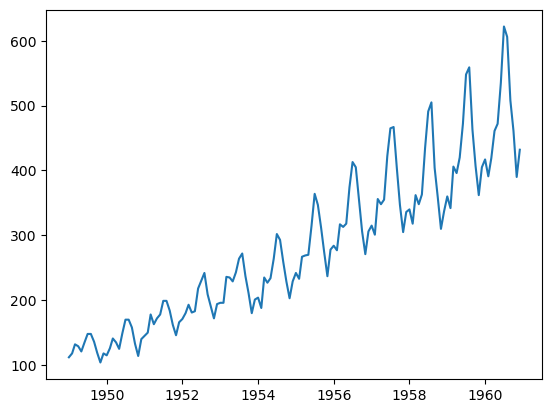

In [6]:
plt.plot(data);

,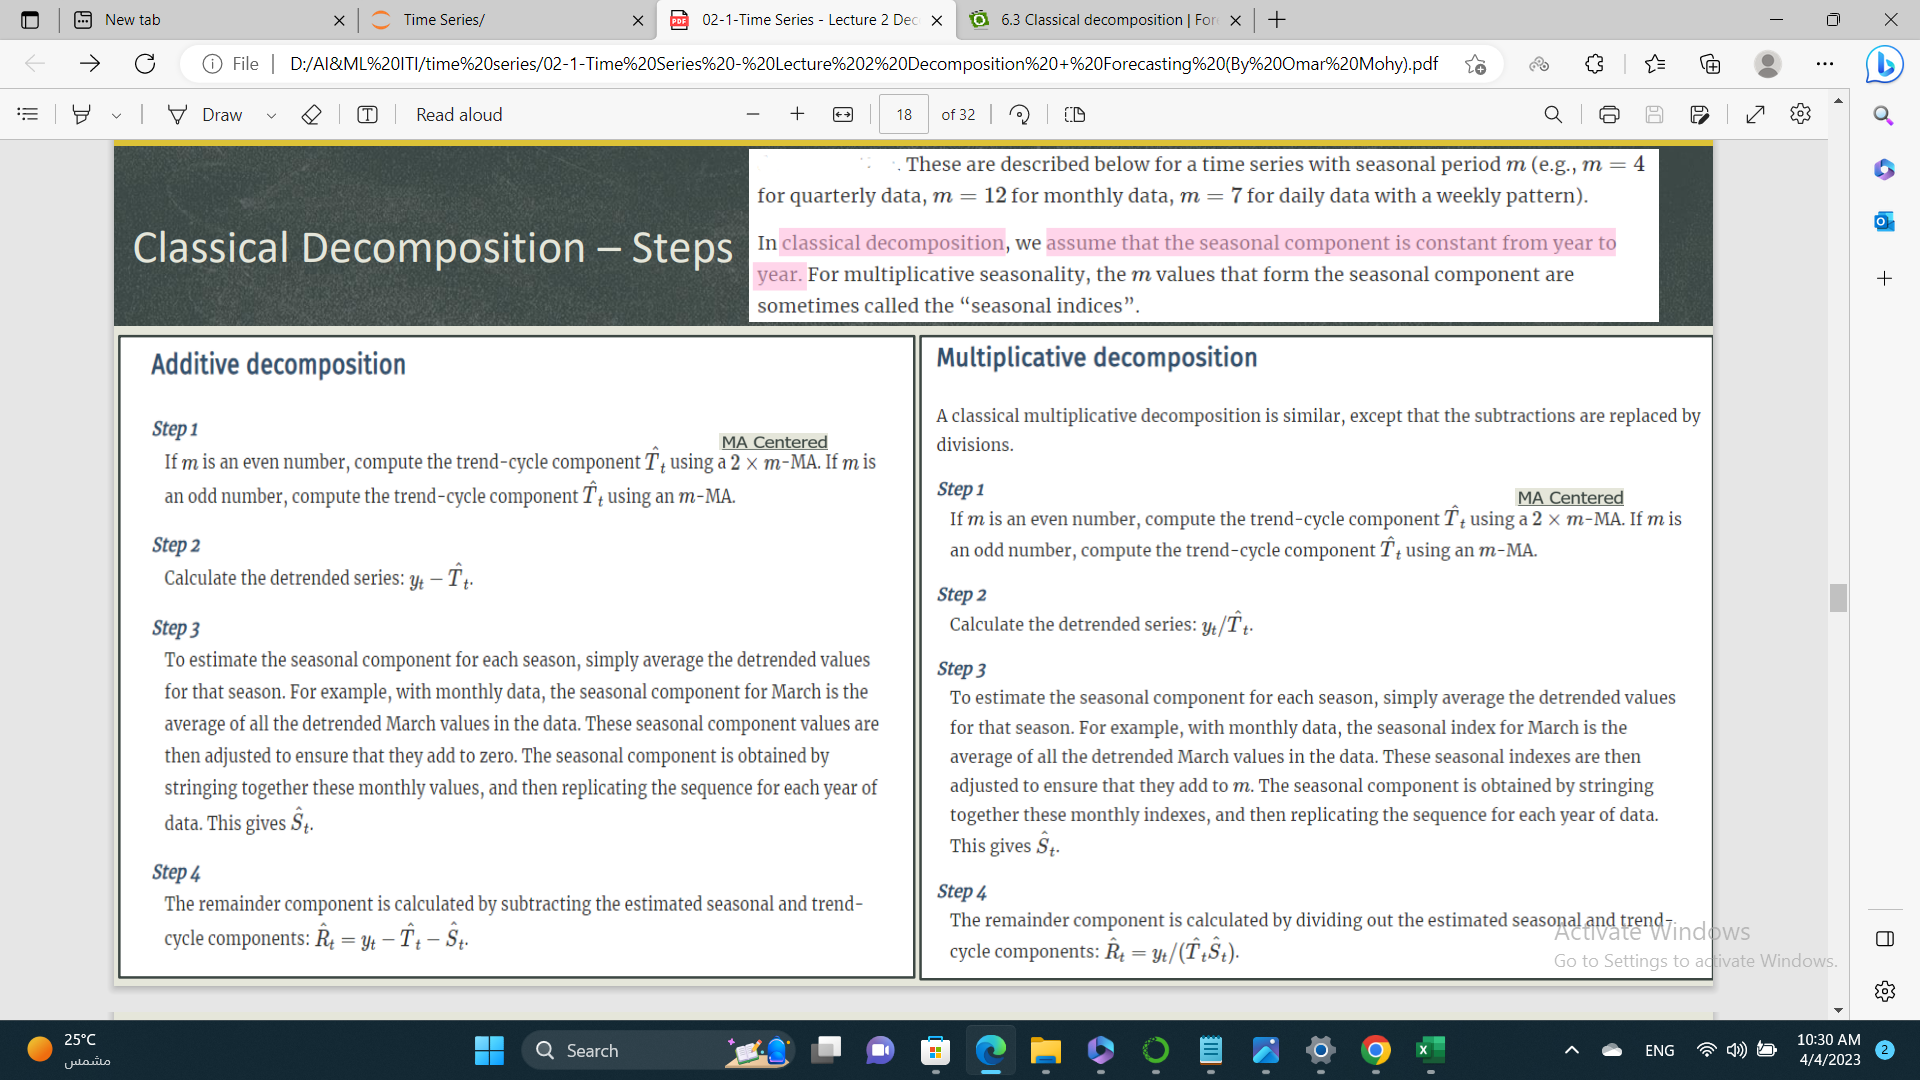

## Additive Model

y(t) = T(t) + S(t) + C(t) + I(t)

The additive model is useful for analyzing time series data as it allows the different components of the time series to be separated out and analyzed separately. For example, the trend component can be used to make long-term predictions about the time series, while the seasonal component can be used to make short-term predictions.

In [7]:
decompose_result = seasonal_decompose(data, model='additive')

In [8]:
trend = decompose_result.trend
seasonal = decompose_result.seasonal
residual = decompose_result.resid

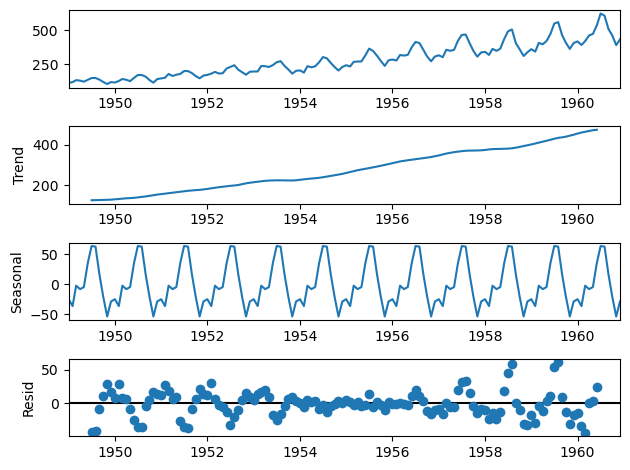

In [9]:
decompose_result.plot();

## Multiplicative Model
y(t) = T(t) x S(t) x C(t) x I(t)

The multiplicative model is useful for analyzing time series data when the variations in the data are proportional to the level of the data. For example, if the magnitude of the seasonal fluctuations in the time series increases with the level of the time series, then a multiplicative model may be more appropriate than an additive model.

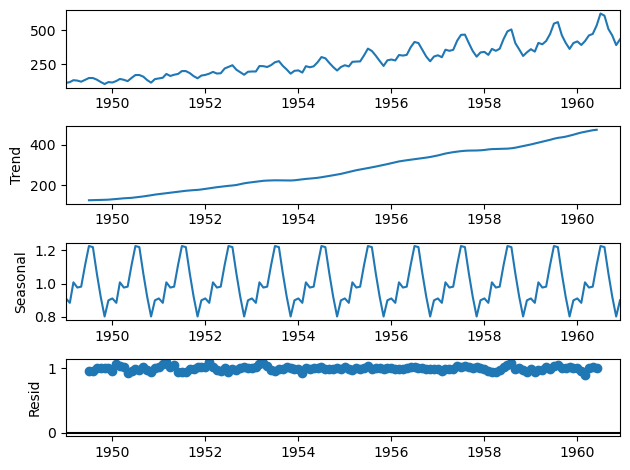

In [94]:
decompose_result.plot()


In [95]:
#option2
data1 = pd.read_csv('AirPassengers.csv', index_col= 0, header= 0, parse_dates=True)

In [96]:
data1

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


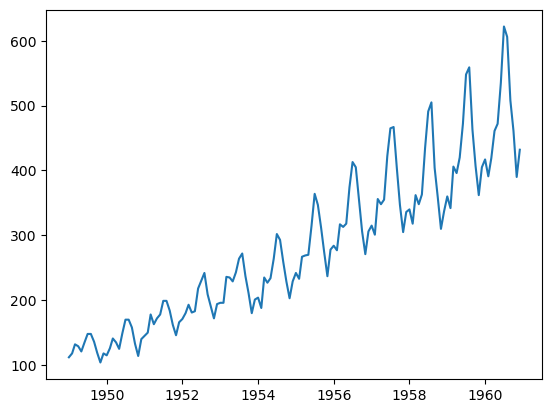

In [97]:
plt.plot(data1);

In [98]:
decompose_result = seasonal_decompose(data1, model='additive')

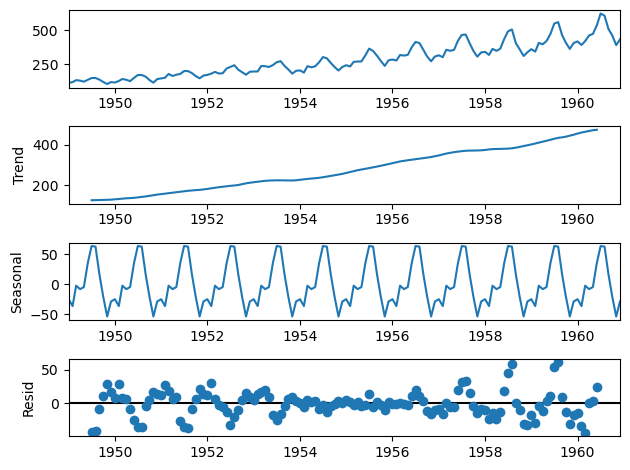

In [99]:
decompose_result.plot();

## Pseudo-additive Model

The pseudo-additive model is a variation of the additive model that is used when the components of the time series are not completely independent. In the pseudo-additive model, the seasonal and irregular components are assumed to be correlated, which means that they are not completely independent of each other.

The pseudo-additive model is useful for analyzing time series data when the seasonal fluctuations are not constant over time, but instead vary depending on the level of the time series. For example, in a time series of sales data, the seasonal component may be larger when sales are higher and smaller when sales are lower.

To implement the pseudo-additive model, the trend component is estimated using a moving average or regression analysis, while the seasonal component is estimated using Fourier series analysis or other techniques. The cyclical and irregular components are then estimated using statistical techniques such as spectral analysis or regression analysis.

Overall, the pseudo-additive model is a useful tool for analyzing time series data when the seasonal fluctuations vary depending on the level of the time series, and can help to better understand the underlying patterns and trends in the data.

𝑌𝑡 = 𝑇𝑡 + 𝑇𝑡(𝑆𝑡 − 1) + 𝑇𝑡(𝑅𝑡 − 1) = 𝑇𝑡(𝑆𝑡 + 𝑅𝑡 − 1)

## Conclusion 
• We should use multiplicative models when the percentage change of our data is more important than the absolute 
value change (e.g., stocks, commodities); 
• As the trend rises and our values grow, we see amplitude growth in seasonal and random fluctuations. If our 
seasonality and fluctuations are stable, we likely have an additive model

Decomposition as a Tool

* This is a useful abstraction. Decomposition is primarily used for time series analysis, and as an analysis tool it can be used to inform forecasting models on your problem. 
* It provides a structured way of thinking about a time series forecasting problem, both generally in terms of modeling complexity and specifically in terms of how-to best capture each of these components in a given model.
* Each of these components are something you may need to think about and address during data preparation, model selection, and model tuning. You may address it explicitly in terms of modeling the trend and subtracting it from your data, or implicitly by providing enough history for an algorithm to model a trend if it may exist. You may or may not be able to cleanly or perfectly break down your specific time series as an additive or multiplicative model.
* Real-world problems are messy and noisy. There may be additive and multiplicative components. There may be an increasing trend followed by a decreasing trend.
* There may be non-repeating cycles mixed in with the repeating seasonality components. Nevertheless, these abstract models provide a simple framework that you can use to analyze your data and explore ways to think about and forecast your problem

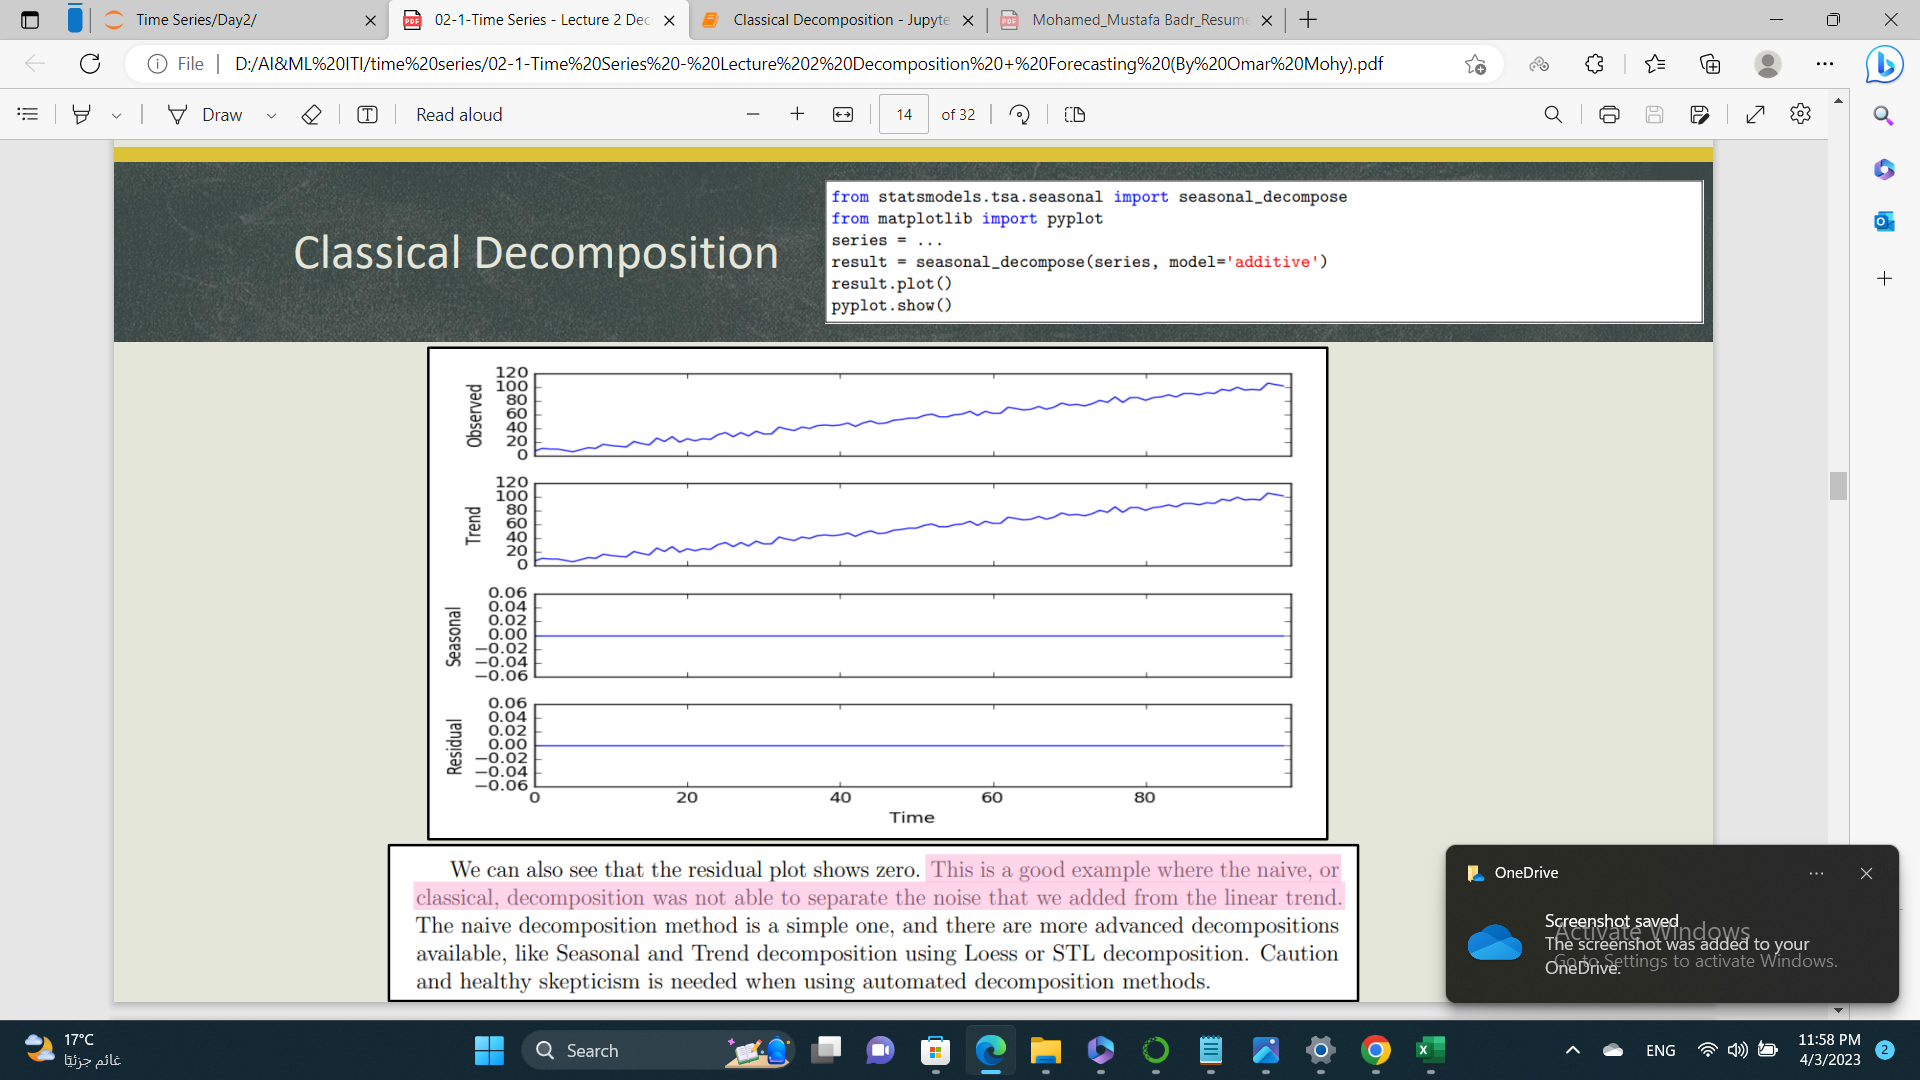

## Using Multiple Linear Regression for Additive Models

Multiple Linear Regression (MLR) can be used for Additive Models in time series analysis to predict the values of a dependent variable based on two or more independent variables. The basic idea behind using MLR is to decompose the time series into its additive components and then model each component separately as a function of one or more independent variables. The estimated values of the additive components are then added together to obtain the predicted values of the dependent variable.

The general equation for an additive model with MLR can be written as:

Y(t) = f(T) + S(t) + I(t)

Where Y(t) represents the value of the dependent variable at time t, T represents the trend component, S(t) represents the seasonal component, and I(t) represents the irregular component. The function f(T) is a function of one or more independent variables that captures the relationship between the trend component and the independent variables.

To use MLR for additive models, we first need to decompose the time series into its additive components using techniques such as STL (Seasonal and Trend decomposition using Loess) or Classical Decomposition. Once we have the additive components, we can then model each component separately using MLR. The independent variables used to model each component can be the same or different depending on the nature of the component and the available data.

For example, to model the trend component as a function of an independent variable, we can use the following equation:

T(t) = β0 + β1X1(t) + β2X2(t) + ... + βkXk(t)

Where T(t) represents the trend component at time t, X1(t), X2(t), ..., Xk(t) represent the independent variables at time t, and β0, β1, β2, ..., βk are the coefficients that represent the relationship between the trend component and the independent variables.

Similarly, to model the seasonal component as a function of an independent variable, we can use the following equation:

S(t) = γ0 + γ1X1(t) + γ2X2(t) + ... + γkXk(t)

Where S(t) represents the seasonal component at time t, X1(t), X2(t), ..., Xk(t) represent the independent variables at time t, and γ0, γ1, γ2, ..., γk are the coefficients that represent the relationship between the seasonal component and the independent variables.

Finally, to model the irregular component as a function of an independent variable, we can use the following equation:

I(t) = ε0 + ε1X1(t) + ε2X2(t) + ... + εkXk(t)

Where I(t) represents the irregular component at time t, X1(t), X2(t), ..., Xk(t) represent the independent variables at time t, and ε0, ε1, ε2, ..., εk are the coefficients that represent the relationship between the irregular component and the independent variables.

Once we have estimated the coefficients for each component, we can then use the equations to predict the values of the dependent variable at any point in time by summing the predicted values of each component.

Overall, MLR can be a useful tool for modeling additive models in time series analysis, especially when we have multiple independent variables that may affect different components of the time series. However, it is important to ensure that the assumptions of MLR are met, such as linearity, normality, homoscedasticity, and independence of errors, before applying it to time series data.

In [103]:
from sklearn.linear_model import LinearRegression

df = data
# Perform STL decomposition to obtain the additive components
# Here, we assume that the time series has a seasonal period of 12
from statsmodels.tsa.seasonal import STL
stl = STL(df['#Passengers'], period=12)
res = stl.fit()
trend = res.trend
seasonal = res.seasonal
residuals = res.resid

# Define the independent variables
# Here, we use lagged values of the time series as the independent variables
df['lag1'] = df['#Passengers'].shift(1)
df['lag2'] = df['#Passengers'].shift(2)
df['lag3'] = df['#Passengers'].shift(3)

# Define the dependent variable and the independent variables for each component
y_trend = trend[3:]
X_trend = df[['lag1', 'lag2', 'lag3']][3:]
y_seasonal = seasonal[3:]
X_seasonal = df[['lag1', 'lag2', 'lag3']][3:]

y_residuals = residuals[3:]
X_residuals = df[['lag1', 'lag2', 'lag3']][3:]

# Fit the linear regression models for each component
reg_trend = LinearRegression().fit(X_trend, y_trend)
reg_seasonal = LinearRegression().fit(X_seasonal, y_seasonal)
reg_residuals = LinearRegression().fit(X_residuals, y_residuals)

# Use the X_residualsredict the values of the dependent variable
y_pred_trend = reg_trend.predict(X_trend)
y_pred_seasonal = reg_seasonal.predict(X_seasonal)
y_pred_residuals = reg_residuals.predict(X_residuals)

# Combine the predicted values of each component to obtain the predicted values of the dependent variable
y_pred = y_pred_trend + y_pred_seasonal + y_pred_residuals

# Calculate the Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE)
mae = mean_absolute_error(y_pred, df['#Passengers'][3:])
rmse = mean_squared_error(y_pred, df['#Passengers'][3:], squared=False)

# Print the results
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")


Mean Absolute Error (MAE): 24.82
Root Mean Squared Error (RMSE): 31.04
